In [ ]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

In [ ]:

! pip install kaggle

In [ ]:
cred = {"username":"hanunshaka","key":"763365a03eae6d3aabd49c0a6a2559a5"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 127MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


##Reading Train Dataset


In [ ]:
train_df = pd.read_csv('twitter_training.csv')
train_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
train_df

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
test_df = pd.read_csv('twitter_validation.csv')
test_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
test_df

,TweetID,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    999 non-null    int64 
 1   Entity     999 non-null    object
 2   Sentiment  999 non-null    object
 3   Content    999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


##Handling Missing Value

In [ ]:
nan_row = train_df[train_df['Content'].isna()]
nan_row

,TweetID,Entity,Sentiment,Content
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [ ]:
train_df.drop(nan_row.index, axis=0, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


##Remove Duplicate Value

In [ ]:
train_duplicate = train_df[train_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
train_duplicate

,TweetID,Entity,Sentiment,Content
10,2402,Borderlands,Positive,was
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
...,...,...,...,...
74590,9185,Nvidia,Neutral,you
74615,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74634,9193,Nvidia,Positive,Love EVERYTHING about it.


In [ ]:
test_duplicate = test_df[test_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
test_duplicate

,TweetID,Entity,Sentiment,Content


In [ ]:
train_df.drop(train_duplicate.index, axis=0, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68590 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    68590 non-null  int64 
 1   Entity     68590 non-null  object
 2   Sentiment  68590 non-null  object
 3   Content    68590 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


##Explanatory Data Analysis

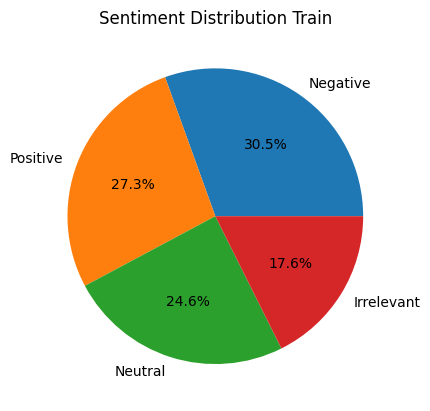

In [ ]:
sentiment_counts = train_df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Sentiment Distribution Train')

plt.show()

In [ ]:
#Word Count
train_df['Word_Count'] = train_df.apply(lambda x: len(str(x['Content']).split()), axis=1)


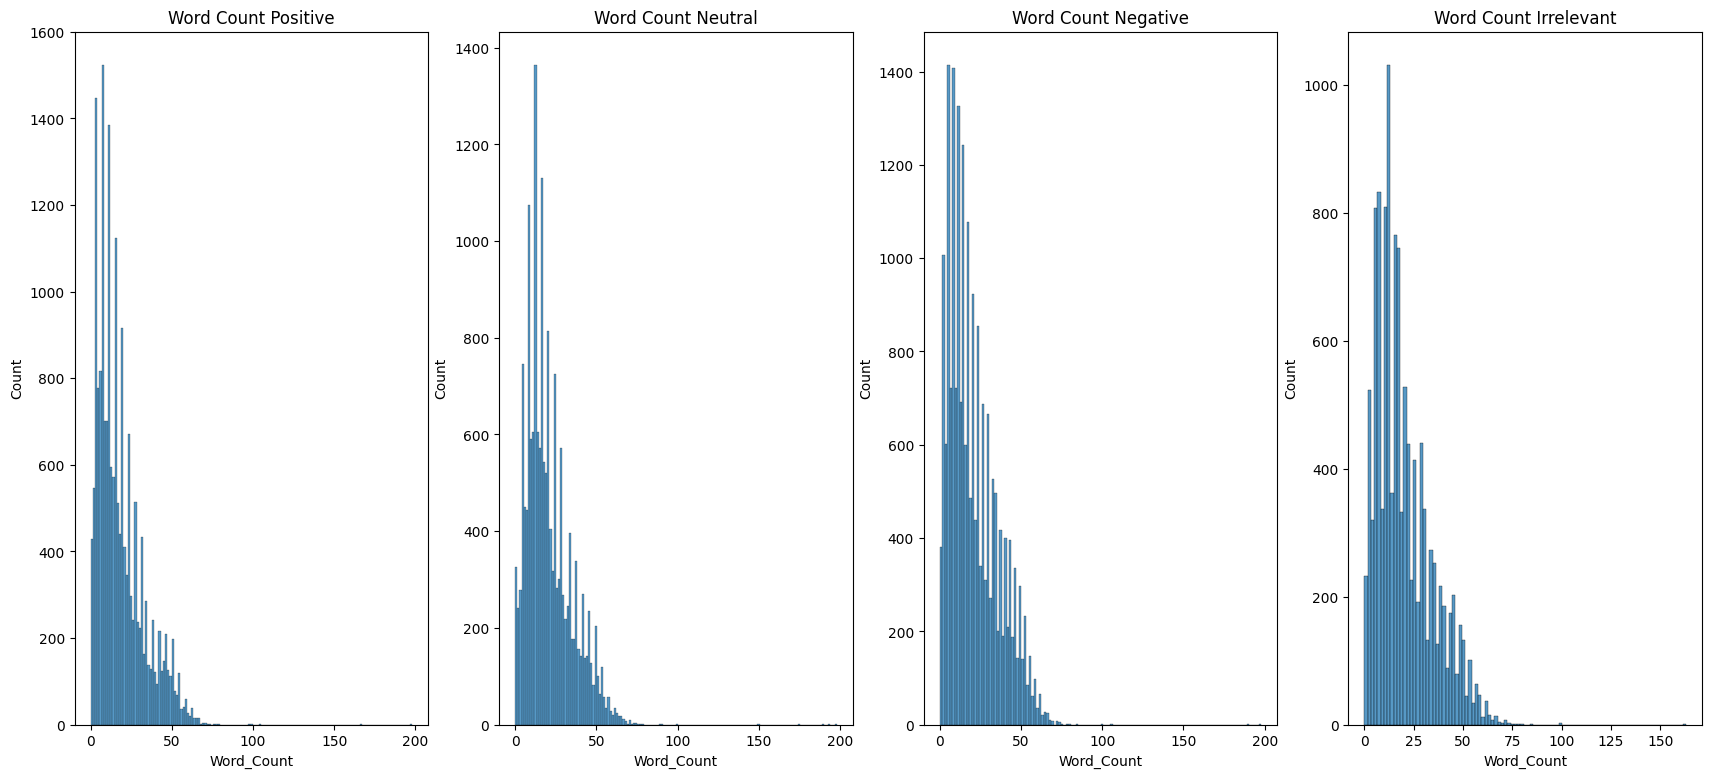

In [ ]:
fig = plt.figure(figsize=(21,9))

n = 1

for i in range(len(train_df['Sentiment'].unique())):
  plt.subplot(1, len(train_df['Sentiment'].unique()), n)
  n += 1
  sns.histplot(x = "Word_Count", data=train_df[train_df['Sentiment'] == train_df['Sentiment'].unique()[i]])
  plt.title(f'Word Count {train_df["Sentiment"].unique()[i]}')
plt.show()

##Analysis Number Of Stopwords

In [ ]:
from wordcloud import STOPWORDS
from collections import Counter
import re

In [ ]:
#POSITIVE

pos_train_df = train_df[train_df["Sentiment"] == "Positive"]["Content"]

pos_train_words = ' '.join(pos_train_df)
pos_train_words = re.sub(r'[^\w\s]', '', pos_train_words.lower())

pos_train_words = pos_train_words.split()

word_freq = Counter(word for word in pos_train_words if word not in STOPWORDS)
word_freq.most_common(10)



[('game', 2172),
 ('im', 1678),
 ('love', 1637),
 ('good', 1494),
 ('really', 1244),
 ('2', 1213),
 ('new', 1161),
 ('now', 1077),
 ('best', 1060),
 ('one', 1015)]

In [ ]:
#NEGATIVE

neg_train_df = train_df[train_df["Sentiment"] == "Negative"]["Content"]

neg_train_words = ' '.join(neg_train_df)
neg_train_words = re.sub(r'[^\w\s]', '', neg_train_words.lower())


neg_train_words = neg_train_words.split()

word_freq = Counter(word for word in neg_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('game', 3711),
 ('shit', 1413),
 ('now', 1391),
 ('im', 1378),
 ('fix', 1301),
 ('play', 1192),
 ('cant', 1173),
 ('fuck', 1107),
 ('please', 1103),
 ('dont', 1095)]

In [ ]:
#NEUTRAL

neu_train_df = train_df[train_df["Sentiment"] == "Neutral"]["Content"]

neu_train_words = ' '.join(neu_train_df)
neu_train_words = re.sub(r'[^\w\s]', '', neu_train_words.lower())

neu_train_words = neu_train_words.split()

word_freq = Counter(word for word in neu_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('johnson', 1710),
 ('2', 1268),
 ('game', 1209),
 ('amazon', 1098),
 ('_', 1074),
 ('now', 964),
 ('one', 837),
 ('im', 837),
 ('new', 830),
 ('facebook', 811)]

In [ ]:
#IRRELEVANT

irr_train_df = train_df[train_df["Sentiment"] == "Irrelevant"]["Content"]

irr_train_words = ' '.join(irr_train_df)
irr_train_words = re.sub(r'[^\w\s]', '', irr_train_words.lower())

irr_train_words = irr_train_words.split()

word_freq = Counter(word for word in irr_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('see', 933),
 ('player', 868),
 ('im', 798),
 ('game', 777),
 ('ban', 737),
 ('people', 715),
 ('one', 644),
 ('4', 640),
 ('good', 639),
 ('love', 638)]

##Modeling


###Bert

In [1]:
!pip install transformers

     ---------------------------------------- 8.2/8.2 MB 22.9 MB/s eta 0:00:00
     -------------------------------------- 152.8/152.8 KB 8.9 MB/s eta 0:00:00
     ------------------------------------- 311.7/311.7 KB 18.8 MB/s eta 0:00:00
     ------------------------------------- 277.8/277.8 KB 17.8 MB/s eta 0:00:00
     ------------------------------------- 269.6/269.6 KB 16.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 23.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 KB ? eta 0:00:00
     ---------------------------------------- 169.0/169.0 KB ? eta 0:00:00


You should consider upgrading via the 'C:\Users\andrian21\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

In [12]:
train_df = pd.read_csv('processed_train_df.csv')
train_df = train_df[['Entity', 'remove_stopwords', 'Sentiment']]
train_df.columns = ['Entity', 'Content', 'Sentiment']
train_df

,Entity,Content,Sentiment
0,Borderlands,"['coming', 'border', 'kill']",Positive
1,Borderlands,"['getting', 'borderland', 'kill']",Positive
2,Borderlands,"['coming', 'borderland', 'murder']",Positive
3,Borderlands,"['getting', 'borderland', '2', 'murder']",Positive
4,Borderlands,"['getting', 'borderland', 'murder']",Positive
...,...,...,...
51576,Nvidia,"['highlight', 'picture', 'reveals', 'best', 'm...",Positive
51577,Nvidia,"['realized', 'mac', 'window', 'partition', '6'...",Positive
51578,Nvidia,"['realized', 'window', 'partition', 'mac', '6'...",Positive
51579,Nvidia,"['realized', 'window', 'partition', 'mac', 'li...",Positive


In [13]:
test_df = pd.read_csv('processed_test_df.csv')
test_df = test_df[['Entity', 'remove_stopwords', 'Sentiment']]
test_df.columns = ['Entity', 'Content', 'Sentiment']
test_df

,Entity,Content,Sentiment
0,Amazon,"['broadcasting', 'corporation', 'news', 'amazo...",Neutral
1,Microsoft,"['pay', 'word', 'function', 'poorly']",Negative
2,CS-GO,"['matchmaking', 'full', 'closet', 'hacking', '...",Negative
3,Google,"['president', 'slapping', 'face', 'really', 'c...",Neutral
4,FIFA,"['hi', 'cellar', 'past', '13', 'year', 'little...",Negative
...,...,...,...
994,GrandTheftAuto(GTA),"['art', 'culture', 'capital', 'wonder', 'want'...",Irrelevant
995,CS-GO,"['actually', 'good', 'move', 'tot', 'bring', '...",Irrelevant
996,Borderlands,"['today', 'sucked', 'time', 'drink', 'wine', '...",Positive
997,Microsoft,"['bought', 'fraction', 'today', 'small', 'win']",Positive


In [14]:
from ast import literal_eval

def combine_list(entity, lst):
    actual_list = literal_eval(lst)
    str_list = ' '.join(actual_list)

    return f'{entity.lower()} : {str_list}'

train_df.loc[:, 'Content'] = train_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)
test_df.loc[:, 'Content'] = test_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)

In [15]:
test_df

,Entity,Content,Sentiment
0,Amazon,amazon : broadcasting corporation news amazon ...,Neutral
1,Microsoft,microsoft : pay word function poorly,Negative
2,CS-GO,cs-go : matchmaking full closet hacking truly ...,Negative
3,Google,google : president slapping face really commit...,Neutral
4,FIFA,fifa : hi cellar past 13 year little sneaky th...,Negative
...,...,...,...
994,GrandTheftAuto(GTA),grandtheftauto(gta) : art culture capital wond...,Irrelevant
995,CS-GO,cs-go : actually good move tot bring viewer on...,Irrelevant
996,Borderlands,borderlands : today sucked time drink wine n p...,Positive
997,Microsoft,microsoft : bought fraction today small win,Positive


In [16]:
train_df

,Entity,Content,Sentiment
0,Borderlands,borderlands : coming border kill,Positive
1,Borderlands,borderlands : getting borderland kill,Positive
2,Borderlands,borderlands : coming borderland murder,Positive
3,Borderlands,borderlands : getting borderland 2 murder,Positive
4,Borderlands,borderlands : getting borderland murder,Positive
...,...,...,...
51576,Nvidia,nvidia : highlight picture reveals best moment...,Positive
51577,Nvidia,nvidia : realized mac window partition 6 year ...,Positive
51578,Nvidia,nvidia : realized window partition mac 6 year ...,Positive
51579,Nvidia,nvidia : realized window partition mac like 6 ...,Positive


In [17]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [8]:
max_length = max(len(tokenizer.encode(text)) for text in train_texts)
max_length

NameError: name 'train_texts' is not defined

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

combined_df = pd.concat([train_df, test_df], ignore_index=True)
data_combined = combined_df[['Content', 'Sentiment']]
data_combined['Sentiment_label'] = pd.Categorical(data_combined['Sentiment'])
data_combined['Sentiment'] = data_combined['Sentiment_label'].cat.codes

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# data_train, data_val = train_test_split(data_combined, train_size=0.1, test_size=0.1)

data_train = train_df[['Content', 'Sentiment']]
data_train['Sentiment_label'] = pd.Categorical(data_train['Sentiment'])
data_train['Sentiment'] = data_train['Sentiment_label'].cat.codes

# # Split the data into training and validation sets
data_val = test_df[['Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes


# Extract the training and testing texts and labels
train_texts = data_train['Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=46)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=46)

# Convert the labels to one-hot encoding
num_labels = len(data_combined['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(46,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(46,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

checkpoint_filepath = 'bert.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

# Use smaller batch size
batch_size = 16
epochs = 10

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
# Train the model with early stopping and model checkpoint
history = model.fit(
    train_dataset.batch(batch_size),
    epochs=epochs,
    validation_data=val_dataset.batch(batch_size),
    callbacks=[model_checkpoint]
)

# Evaluate the model
model.evaluate(val_dataset.batch(batch_size))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



 10/129 [=>............................] - ETA: 38:30 - loss: 1.4388 - accuracy: 0.2950

KeyboardInterrupt: 

In [18]:
# Split the data into training and testing sets
# data_train, data_val = train_test_split(data, test_size=0.2)

# # Load and preprocess the data
data_train = train_df[['Content', 'Sentiment']]
data_train['Sentiment_label'] = pd.Categorical(data_train['Sentiment'])
data_train['Sentiment'] = data_train['Sentiment_label'].cat.codes

# # Split the data into training and validation sets
data_val = test_df[['Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes

# Extract the training and validation texts and labels
train_texts = data_train['Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

In [19]:
# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=46)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=46)

# Convert the labels to one-hot encoding
num_labels = len(data_train['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))


In [20]:
# Define the model architecture
# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(46, ), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(46, ), dtype=tf.int32, name='attention_mask')

# Use model.layers[:-2] to exclude the pooler layer and the output layer
bert_output = model([input_ids, attention_mask]).last_hidden_state
output = tf.keras.layers.Dense(num_labels, activation='softmax')(bert_output[:, 0, :])  # Pooling the output

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6)  
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']


# Define the ModelCheckpoint callback to save the best weights
checkpoint_filepath = 'bert.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Use smaller batch size
batch_size = 16
epochs = 10

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with early stopping and model checkpoint
history = model.fit(
    train_dataset.batch(batch_size),
    epochs=epochs,
    validation_data=val_dataset.batch(batch_size),
    callbacks=[model_checkpoint]
)

# Evaluate the model
model.evaluate(val_dataset.batch(batch_size))


Epoch 1/10


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3224/3224 [==============================] - ETA: 0s - loss: 1.1202 - accuracy: 0.5142
Epoch 1: val_loss improved from inf to 1.14201, saving model to bert.h5


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3224/3224 [==============================] - 2879s 889ms/step - loss: 1.1202 - accuracy: 0.5142 - val_loss: 1.1420 - val_accuracy: 0.5636
Epoch 2/10
3224/3224 [==============================] - ETA: 0s - loss: 0.9596 - accuracy: 0.6039
Epoch 2: val_loss improved from 1.14201 to 0.93327, saving model to bert.h5
3224/3224 [==============================] - 2831s 878ms/step - loss: 0.9596 - accuracy: 0.6039 - val_loss: 0.9333 - val_accuracy: 0.6416
Epoch 3/10
3224/3224 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.6764
Epoch 3: val_loss improved from 0.93327 to 0.72561, saving model to bert.h5
3224/3224 [==============================] - 2828s 877ms/step - loss: 0.8089 - accuracy: 0.6764 - val_loss: 0.7256 - val_accuracy: 0.7287
Epoch 4/10
3224/3224 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.7530
Epoch 4: val_loss improved from 0.72561 to 0.55152, saving model to bert.h5
3224/3224 [==============================] - 2834s 879ms/step - 

[0.28135958313941956, 0.9199199080467224]

16/16 [==============================] - 6s 361ms/step
Validation Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.94      0.91      0.92       171
    Negative       0.95      0.92      0.94       266
     Neutral       0.90      0.92      0.91       285
    Positive       0.90      0.93      0.92       277

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92       999



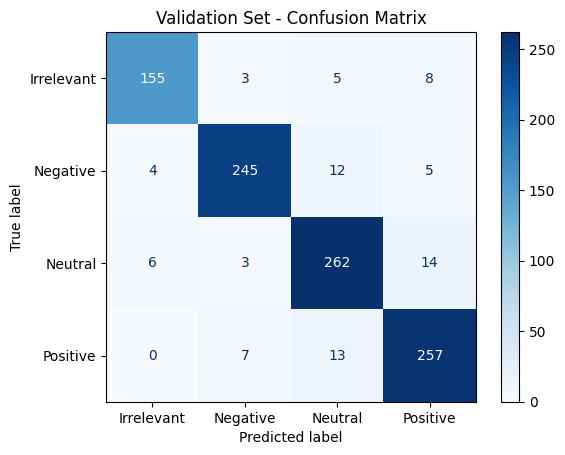

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.93      0.89      0.91       171
    Negative       0.94      0.91      0.92       266
     Neutral       0.89      0.90      0.89       285
    Positive       0.89      0.92      0.90       277

    accuracy                           0.91       999
   macro avg       0.91      0.91      0.91       999
weighted avg       0.91      0.91      0.91       999



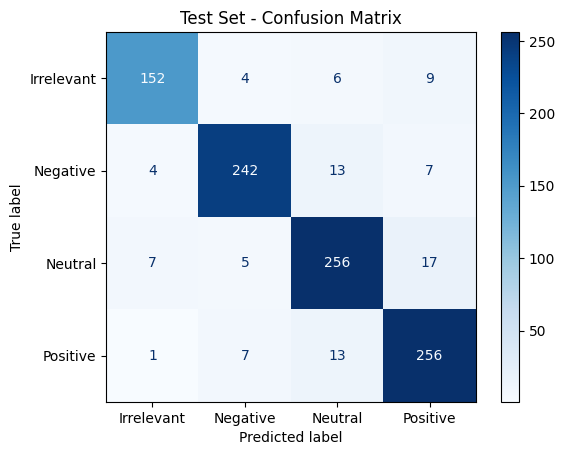

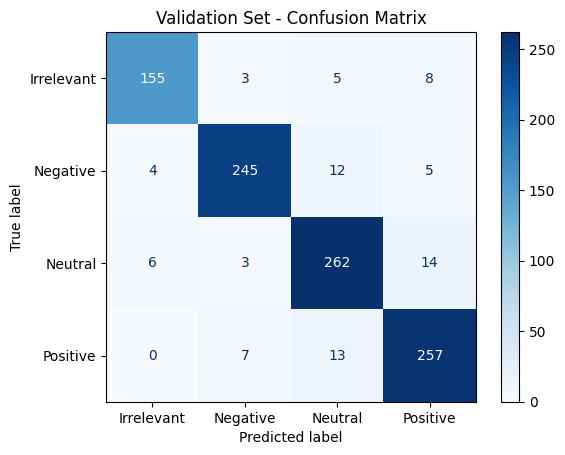

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.93      0.89      0.91       171
    Negative       0.94      0.91      0.92       266
     Neutral       0.89      0.90      0.89       285
    Positive       0.89      0.92      0.90       277

    accuracy                           0.91       999
   macro avg       0.91      0.91      0.91       999
weighted avg       0.91      0.91      0.91       999



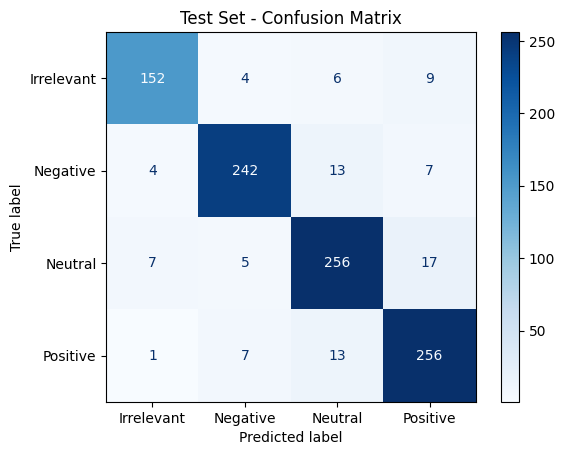

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Load and preprocess the data
data_test = test_df[['Content', 'Sentiment']]
data_test['Sentiment_label'] = pd.Categorical(data_test['Sentiment'])
data_test['Sentiment'] = data_test['Sentiment_label'].cat.codes

test_texts = data_test['Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=24)

# Convert the labels to one-hot encoding
num_labels = len(data_test['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]
test_predicted_sentiments = data_test['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the validation set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Validation Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the valing set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the valing set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()


save_folder = 'Bert'
os.makedirs(save_folder, exist_ok=True)
val_report_path = os.path.join(save_folder, 'validation_classification_report.txt')
with open(val_report_path, 'w') as file:
    file.write("Validation Set - Classification Report:\n")
    file.write(val_classification_rep)

# Plot the confusion matrix for the validation set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
val_image_path = os.path.join(save_folder, 'validation_confusion_matrix.png')
plt.savefig(val_image_path)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Save the classification report for the test set to a file
test_report_path = os.path.join(save_folder, 'test_classification_report.txt')
with open(test_report_path, 'w') as file:
    file.write("Test Set - Classification Report:\n")
    file.write(test_classification_rep)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
test_image_path = os.path.join(save_folder, 'test_confusion_matrix.png')
plt.savefig(test_image_path)
plt.show()

In [ ]:
import pandas as pd

# Assuming data_train and data_test are your pandas DataFrames
correctly_predicted_train = data_train[data_train['Sentiment_label'] == train_predicted_sentiments]
correctly_predicted_test = data_test[data_test['Sentiment_label'] == test_predicted_sentiments]

# Print the correctly predicted rows in the training set
print("Correctly predicted rows in the training set:")
print(correctly_predicted_train)

# Print the correctly predicted rows in the test set
print("Correctly predicted rows in the test set:")
print(correctly_predicted_test)


In [ ]:
# Assuming data_train and data_test are your pandas DataFrames
incorrectly_predicted_train = data_train[data_train['Sentiment_label'] != train_predicted_sentiments]
incorrectly_predicted_test = data_test[data_test['Sentiment_label'] != test_predicted_sentiments]

# Print the incorrectly predicted rows in the training set
print("Incorrectly predicted rows in the training set:")
print(incorrectly_predicted_train.head(5))

# Print the incorrectly predicted rows in the test set
print("Incorrectly predicted rows in the test set:")
print(incorrectly_predicted_test.head(5))


In [ ]:
import pandas as pd

# Assuming data_train and data_test are your pandas DataFrames
data_train['Predicted_label'] = train_predicted_sentiments
data_test['Predicted_label'] = test_predicted_sentiments

# Identify the incorrectly predicted rows
incorrectly_predicted_train = data_train[data_train['Sentiment_label'] != data_train['Predicted_label']]
incorrectly_predicted_test = data_test[data_test['Sentiment_label'] != data_test['Predicted_label']]

# Print the incorrectly predicted rows in the training set
print("Incorrectly predicted rows in the training set:")
print(incorrectly_predicted_train)

# Print the incorrectly predicted rows in the test set
print("Incorrectly predicted rows in the test set:")
print(incorrectly_predicted_test)


In [ ]:
model.save_weights('bert_weights.h5')

In [ ]:
incorrectly_predicted_train[incorrectly_predicted_train['Sentiment_label'] == 'Negative'].to_csv('incorrect_train_neg.csv')

In [ ]:
incorrectly_predicted_test[incorrectly_predicted_test['Sentiment_label'] == 'Negative'].to_csv('incorrect_test_neg.csv')

In [ ]:
incorrectly_predicted_train[incorrectly_predicted_train['Sentiment_label'] == 'Irrelevant'].to_csv('incorrect_train_irr.sv')

In [ ]:
incorrectly_predicted_test[incorrectly_predicted_test['Sentiment_label'] == 'Irrelevant'].to_csv('incorrect_test_irr.csv')

In [ ]:
incorrectly_predicted_train[incorrectly_predicted_train['Sentiment_label'] == 'Positive'].to_csv('incorrect_train_pos.csv')

In [ ]:
incorrectly_predicted_test[incorrectly_predicted_test['Sentiment_label'] == 'Positive'].to_csv('incorrect_test_pos.csv')

In [ ]:
incorrectly_predicted_train[incorrectly_predicted_train['Sentiment_label'] == 'Neutral'].to_csv('incorrect_train_neu.csv')

In [ ]:
incorrectly_predicted_test[incorrectly_predicted_test['Sentiment_label'] == 'Neutral'].to_csv('incorrect_test_neu.csv')

In [ ]:
!zip -r res.zip res
